**Task 1 - API Integration & Data Visulaization**

In [4]:
import requests

# Example API URL (CoinGecko API for cryptocurrency data)
url = "https://api.coingecko.com/api/v3/coins/markets"
params = {
    "vs_currency": "usd",
    "order": "market_cap_desc",
    "per_page": 10,
    "page": 1,
    "sparkline": False
}

try:
    response = requests.get(url, params=params)
    response.raise_for_status()  # Check for HTTP errors
    data = response.json()
    print(data[:2])  # Displaying the first two entries for a quick check
except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")

[{'id': 'bitcoin', 'symbol': 'btc', 'name': 'Bitcoin', 'image': 'https://coin-images.coingecko.com/coins/images/1/large/bitcoin.png?1696501400', 'current_price': 82298, 'market_cap': 1633035751439, 'market_cap_rank': 1, 'fully_diluted_valuation': 1633035751439, 'total_volume': 40151389361, 'high_24h': 86105, 'low_24h': 80124, 'price_change_24h': -3596.961578564369, 'price_change_percentage_24h': -4.18764, 'market_cap_change_24h': -72705652200.79932, 'market_cap_change_percentage_24h': -4.26241, 'circulating_supply': 19834746.0, 'total_supply': 19834746.0, 'max_supply': 21000000.0, 'ath': 108786, 'ath_change_percentage': -24.24525, 'ath_date': '2025-01-20T09:11:54.494Z', 'atl': 67.81, 'atl_change_percentage': 121432.83813, 'atl_date': '2013-07-06T00:00:00.000Z', 'roi': None, 'last_updated': '2025-03-10T06:23:10.754Z'}, {'id': 'ethereum', 'symbol': 'eth', 'name': 'Ethereum', 'image': 'https://coin-images.coingecko.com/coins/images/279/large/ethereum.png?1696501628', 'current_price': 2063

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Convert the API data to a DataFrame
df = pd.DataFrame(data)

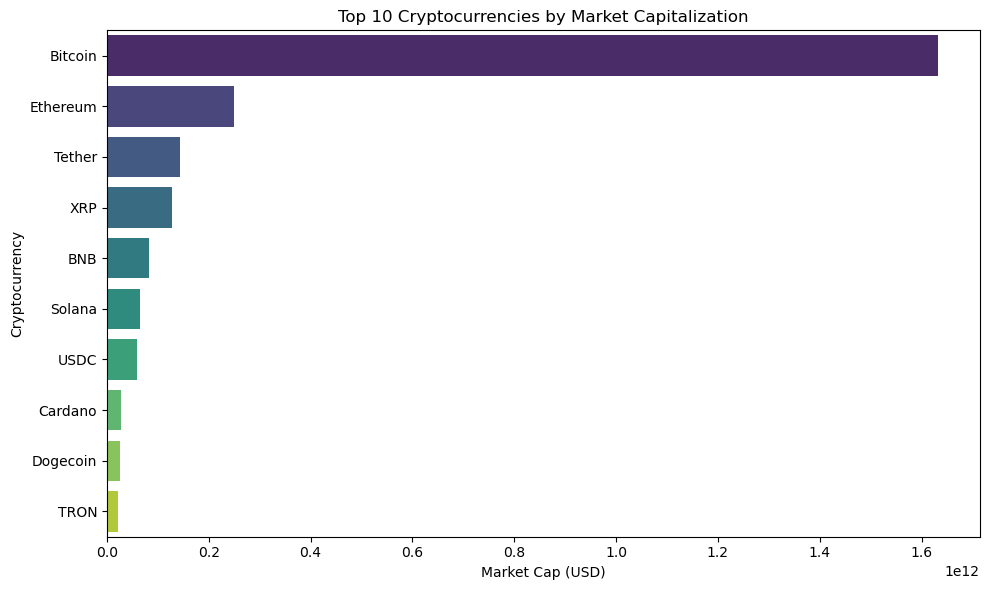

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x='market_cap', y='name', data=df, hue='name', dodge=False, palette='viridis', legend=False)
plt.xlabel('Market Cap (USD)')
plt.ylabel('Cryptocurrency')
plt.title('Top 10 Cryptocurrencies by Market Capitalization')
plt.tight_layout()
plt.show()

In [12]:
pip install jupyter-dash

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [15]:
import requests
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

# Fetch data from the public API (CoinGecko API for cryptocurrency data)
url = "https://api.coingecko.com/api/v3/coins/markets"
params = {
    "vs_currency": "usd",
    "order": "market_cap_desc",
    "per_page": 10,
    "page": 1,
    "sparkline": False
}

try:
    response = requests.get(url, params=params)
    response.raise_for_status()
    data = response.json()
    df = pd.DataFrame(data)
except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")
    df = pd.DataFrame()

# Initialize the Dash app
app = Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Cryptocurrency Market Capitalization Dashboard"),
    dcc.Dropdown(
        id='metric-dropdown',
        options=[
            {'label': 'Market Cap', 'value': 'market_cap'},
            {'label': 'Current Price', 'value': 'current_price'},
            {'label': 'Total Volume', 'value': 'total_volume'}
        ],
        value='market_cap',
        clearable=False
    ),
    dcc.Graph(id='crypto-bar-chart')
])

# Define the callback to update the chart based on the dropdown selection
@app.callback(
    Output('crypto-bar-chart', 'figure'),
    Input('metric-dropdown', 'value')
)
def update_chart(selected_metric):
    fig = px.bar(df, x='name', y=selected_metric,
                 title=f'Top 10 Cryptocurrencies by {selected_metric.replace("_", " ").title()}',
                 color='name',
                 labels={'name': 'Cryptocurrency', selected_metric: selected_metric.title()})
    return fig

# Run the Dash app with a different port
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)